In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from acquire import get_telco_data
from wrangle import wrangle_telco

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type,payment_type,internet_service_type,churn
0,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,...,No,No,No,No,Yes,No,Month-to-month,Mailed check,DSL,No
1,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,...,No,Yes,No,No,No,Yes,Month-to-month,Electronic check,Fiber optic,Yes
2,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,...,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Electronic check,Fiber optic,Yes
3,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,...,No,No,Yes,Yes,No,Yes,Month-to-month,Mailed check,Fiber optic,Yes
4,0013-MHZWF,Female,0,No,Yes,9,69.4,571.45,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Month-to-month,Credit card (automatic),DSL,No


In [49]:
df.streaming_tv

0                        No
1                        No
2                       Yes
3                       Yes
4                       Yes
               ...         
7038    No internet service
7039    No internet service
7040    No internet service
7041                     No
7042                    Yes
Name: streaming_tv, Length: 7043, dtype: object

### encode

In [4]:
# step 1 split
train, test = train_test_split(df)

In [5]:
# step 2 encode, no = 0, yes = 1 
encoder = LabelEncoder()

encode_list = [
    'gender', 'partner', 'dependents', 'phone_service'
    , 'multiple_lines', 'online_security', 'online_backup'
    , 'device_protection', 'tech_support'
    , 'streaming_movies', 'streaming_tv', 'paperless_billing', 'churn'
    ]
               
               
               
for c in encode_list:
    train[c] = encoder.fit_transform(train[c])
    test[c] = encoder.transform(test[c])

In [6]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type,payment_type,internet_service_type,churn
2197,3737-GCSPV,0,0,1,0,11,96.2,1222.05,1,2,...,0,0,2,2,0,1,Month-to-month,Credit card (automatic),Fiber optic,1
5961,7901-IIDQV,1,0,0,0,24,54.6,1242.25,1,2,...,0,0,2,0,0,0,One year,Bank transfer (automatic),DSL,0
6113,8961-QDZZJ,0,0,1,1,57,95.0,5535.80,1,0,...,2,0,0,2,2,1,One year,Electronic check,Fiber optic,0
5572,8663-UPDGF,0,0,0,0,26,69.5,1800.05,1,2,...,2,0,0,2,0,1,Month-to-month,Bank transfer (automatic),DSL,0
3383,4910-GMJOT,0,0,0,0,1,94.6,94.60,1,2,...,0,0,0,2,2,1,Month-to-month,Electronic check,Fiber optic,1


### Distribution of churn rates

In [ ]:
y = 'churn'
churn_rate = train.churn.mean()

plt.subplot(131)
sns.swarmplot('gender', y, data=train)

plt.subplot(132)
sns.barplot('senior_citizen', y, data=train)

plt.subplot(133)
sns.barplot('partner', y, data=train)

plt.subplot(134)
sns.barplot('dependents', y, data=train)

plt.subplot(231)
sns.barplot('phone_service', y, data=train)

plt.subplot(232)
sns.barplot('multiple_lines', y, data=train)

plt.subplot(233)
sns.barplot('online_backup', y, data=train)

plt.subplot(234)
sns.barplot('device_protection', y, data=train)

plt.subplot(331)
sns.barplot('tech_support', y, data=train)

plt.subplot(332)
sns.barplot('streaming_tv', y, data=train)

plt.subplot(333)
sns.barplot('streaming_movies', y, data=train)

plt.subplot(334)
sns.barplot('paperless_billing', y, data=train )

plt.ylabel('Churn Rate')
plt.axhline(churn_rate, ls='--', color='grey')

In [ ]:
features = train[['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']]
target = train[['churn']]

sns.boxplot(features, target, data=train)
    

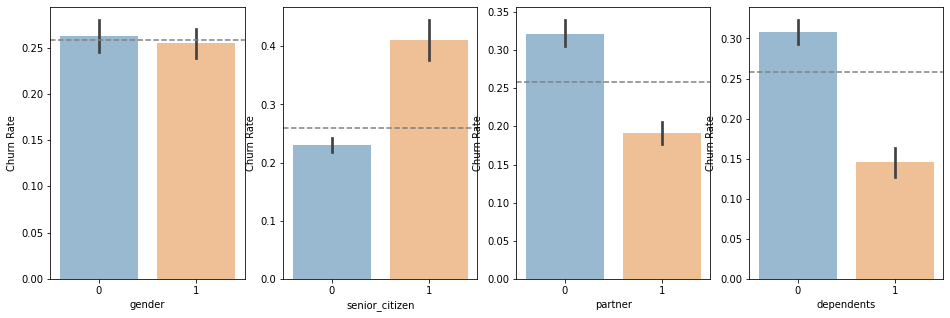

In [42]:
features = ['gender', 'senior_citizen', 'partner', 'dependents']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')


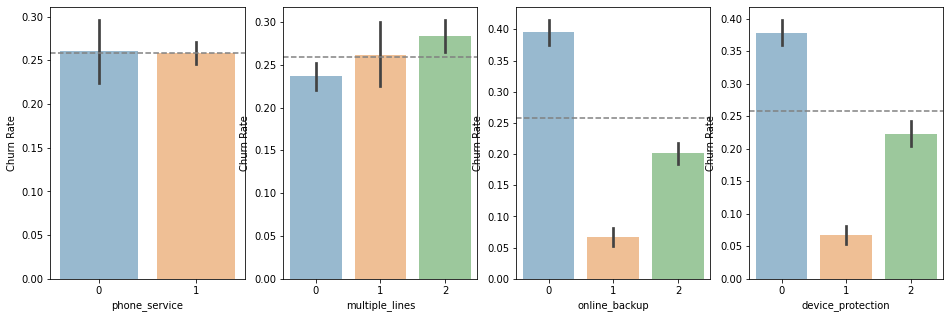

In [44]:
features = ['phone_service', 'multiple_lines', 'online_backup', 'device_protection']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [51]:
df.device_protection

0                        No
1                       Yes
2                       Yes
3                        No
4                        No
               ...         
7038    No internet service
7039    No internet service
7040    No internet service
7041                    Yes
7042                    Yes
Name: device_protection, Length: 7043, dtype: object

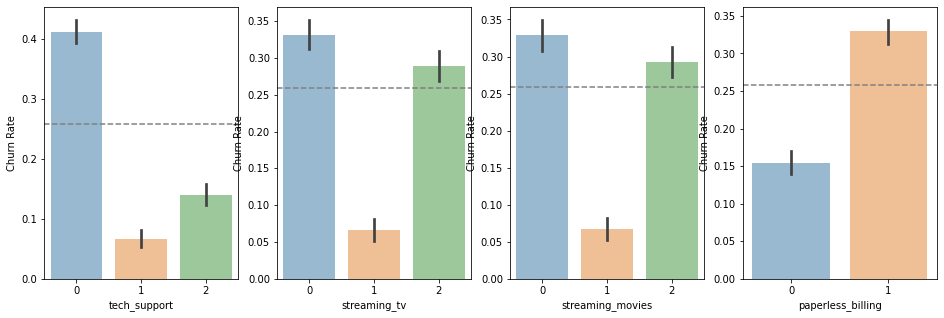

In [43]:
features = ['tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [50]:
df.tech_support

0                        No
1                        No
2                        No
3                       Yes
4                       Yes
               ...         
7038    No internet service
7039    No internet service
7040    No internet service
7041                    Yes
7042                     No
Name: tech_support, Length: 7043, dtype: object

### modeling

In [ ]:
# creating our X, y and validate datasets

train, validate = train_test_split(train, random_state=123, test_size=.2)


X_train = train.drop(columns=['customer_id', 'churn', 'contract_type', 'payment_type', 'internet_service_type'])
y_train = train[['churn']]
X_val = validate.drop(columns=['customer_id', 'churn', 'contract_type', 'payment_type', 'internet_service_type'])
y_val = validate[['churn']]
X_test = test.drop(columns=['customer_id', 'churn', 'contract_type', 'payment_type', 'internet_service_type'])
y_test = test[['churn']]

### Feature selection

In [ ]:
f_selector = SelectKBest(chi2, k=5).fit(X_train, y_train)

X_reduced = f_selector.transform(X_train)

print(X_train.shape)
print(X_reduced.shape)

In [ ]:
f_support = f_selector.get_support()

print(f_support)

In [ ]:
f_feature = X_train.loc[:,f_support].columns.tolist()

print(str(len(f_feature)), 'selected features')
print(f_feature)

### Changing our df to reflect our selectkbest feature selection tool's results

In [ ]:
#X_train = X_train[['tenure', 'monthly_charges', 'total_charges', 'online_security', 'tech_support']]
#X_val = X_val[['tenure', 'monthly_charges', 'total_charges', 'online_security', 'tech_support']] 
#X_test = X_test[['tenure', 'monthly_charges', 'total_charges', 'online_security', 'tech_support']]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

In [ ]:
print(classification_report(y_train, y_pred))

### Accuracy on validate dataset

In [ ]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_val, y_val)))

### messing with something i found on towards data science lol

In [ ]:
X = train.drop(columns=['customer_id', 'churn', 'contract_type', 'payment_type', 'internet_service_type'])
y = train.churn.to_numpy()
y[0:5]

In [ ]:
# cross validation is suppose to make our model more accurate somehow...blackbox'in'itt
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

In [ ]:
# hypertuning mode parameters
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

In [ ]:
knn_best = knn_gscv.best_estimator_
predictions = knn_best.predict(X_test)

### Running our classifier with 4 parameters

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [ ]:
y_pred_proba

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_val, y_val)))